In [1]:
import coffea
from coffea.nanoevents import NanoAODSchema, NanoEventsFactory
import awkward as ak
import numpy as np
from python.cms_utils import GetMuonSF
import correctionlib
import matplotlib.pyplot as plt

In [2]:
from python.cms_utils import getLumiMaskRun2

In [3]:
from datetime import datetime
datetime.today().strftime('%d%m')

'0906'

In [103]:
IOV = '2016APV'
fname = "correctionFiles/muonSF/UL"+IOV+"/muon_Z.json.gz"

evaluator = correctionlib.CorrectionSet.from_file(fname)
evaluator["NUM_GlobalMuons_DEN_genTracks"].evaluate(1.1, 50.0,  'nominal') ## Reconstruction
evaluator["NUM_MediumID_DEN_TrackerMuons"].evaluate(1.1, 50.0,  'nominal') ## MediumID efficiency
evaluator["NUM_TightRelIso_DEN_MediumID"].evaluate(1.1, 50.0,  'nominal') ## Tight ISO ID efficiency
#evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'nominal')

0.9996145084763732

In [7]:
evaluator["NUM_IsoMu24_or_IsoTkMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'nominal')

IndexError: map::at

In [15]:
GetMuonSF(IOV, 'HLT', np.array([[1., 2.]]), np.array([[10., 140.]]), var="sfdown")

correctionFiles/muonSF/UL2016APV/muon_Z.json.gz


<Array [[0.945, 0.979]] type='1 * var * float64'>

In [8]:
evaluator["NUM_MediumID_DEN_TrackerMuons"].evaluate(1.1, 50.0,  'nominal') ## MediumID efficiency

0.9955082832064152

In [57]:
evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 30.1,  'nominal')

0.9709748540182914

In [43]:
evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'syst')

0.0005968894742857178

In [44]:
evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'systup')

0.9698119577070924

In [52]:
np.sqrt(evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'stat')**2 + evaluator["NUM_IsoMu24_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(1.1, 100.0,  'syst')**2)

0.000851056846733679

In [53]:
0.9698119577070924 - 0.9689609008603588

0.0008510568467335888

In [45]:
0.9689609008603588+0.0005968894742857178

0.9695577903346445

In [2]:
sample_filename = "samples/SingleElectron_UL2017_NanoAODv9_files.txt"

In [162]:
with open(sample_filename) as f:
    filenames = [ i.rstrip() for i in f.readlines() if i[0] != "#"  ] 


#filename = "/store/data/Run2017H/SingleMuon/NANOAOD/UL2017_MiniAODv2_NanoAODv9_GT36-v1/2530000/D8402BC3-3095-4C42-8497-4B28A3DD7ADD.root"

In [4]:
prestring = "root://cmsxrootd.fnal.gov/"

In [163]:
#file_path = 'root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL18NanoAODv9/TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2530000/AF653D77-1645-6A4A-AF3B-7397F36C6F36.root'

In [3]:
for filename in filenames:
    prestring = "root://cmsxrootd.fnal.gov/"
    #prestring = "root://cms-xrd-global.cern.ch/"
    #prestring = "root://xrootd-cms.infn.it"
    file_path = prestring  + filename
    events = NanoEventsFactory.from_root(
        file_path, 
        treepath="Events", 
        schemaclass=NanoAODSchema
    ).events()
    print(filename)
    del events



NameError: name 'filenames' is not defined

In [5]:
file_path = prestring  + '/store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/280000/B952BD0D-8ED3-4947-9950-14558DD49DF4.root'
events = NanoEventsFactory.from_root(
    file_path, 
    treepath="Events", 
    schemaclass=NanoAODSchema
).events()

In [41]:
ev1 = events[events.event == 9335221 ]


In [46]:
ev1.Muon[ev1.Muon.mediumId == 1].mediumId

<Array [[True, True]] type='1 * var * bool[parameters={"__doc__": "cut-based ID,...'>

In [36]:
ev1.Electron.isTight

<Array [[False]] type='1 * var * bool'>

In [37]:
ev1.Electron.eta

<Array [[-0.063]] type='1 * var * float32[parameters={"__doc__": "eta"}]'>

In [12]:
ev1.FatJet.phi

<Array [[2.23, -0.999, -0.732]] type='1 * var * float32[parameters={"__doc__": "...'>

In [50]:
ev1.GenDressedLepton.pt

<Array [[208, 37]] type='1 * var * float32[parameters={"__doc__": "pt"}]'>

In [51]:
ev1.Electron.pt

<Array [[16.5]] type='1 * var * float32[parameters={"__doc__": "p_{T}"}]'>

In [58]:
ev1.Electron.mvaFall17V2Iso_WP90

<Array [[False]] type='1 * var * bool[parameters={"__doc__": "MVA Iso ID V2 WP90"}]'>

In [52]:
ev1.Muon.pt

<Array [[206, 37.2]] type='1 * var * float32[parameters={"__doc__": "pt"}]'>

In [53]:
ev1.Muon.pfIsoId

<Array [[6, 0]] type='1 * var * uint8[parameters={"__doc__": "PFIso ID from mini...'>

In [54]:
ev1.Muon.miniIsoId

<Array [[4, 4]] type='1 * var * uint8[parameters={"__doc__": "MiniIso ID from mi...'>

In [29]:
ev1.FatJet.pt

<Array [[183]] type='1 * var * float32[parameters={"__doc__": "pt"}]'>

In [5]:
import awkward as ak
ak.firsts(events.FatJet).pt

<Array [461, 612, 928, 436, ... 481, 286, 408] type='88374 * ?float32[parameters...'>

In [126]:
ak.num(events.FatJet)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 3, 3, 5] type='88374 * int64'>

In [108]:
ev

NameError: name 'ev' is not defined

In [200]:
events_2J = events[ak.num(events.FatJet)>0]
#plt.hist(events.FatJet[:,0].nConstituents)

In [186]:
events_2J =  events[ak.num(events.FatJet)>1]
events_2J

<NanoEventsArray [<event 1:36:257579>, ... ] type='88095 * event'>

In [187]:
ak.sum(events_2J.FatJet[:, 1].muonIdx3SJ > -1)

32509

In [201]:
events_2J = ak.with_field(
                events_2J,
                events_2J.FatJet[(events_2J.FatJet.jetId == 6) 

                
                ],
                "FatJet"
            )

In [202]:
events_2J = ak.with_field(
                events_2J,
                events_2J.Muon[(events_2J.Muon.pt > 20) 
                            &(np.abs(events_2J.Muon.eta) < 2.5)
                            &(events_2J.Muon.pfIsoId > 2) #medium iso, pfIso04 < 0.2 , 2 = loose
                            &(events_2J.Muon.mediumId	 == True)
                            #&(events0.Muon.looseId	 == True)
                
                ],
                "Muon"
            )

In [203]:
fj = events_2J.FatJet
mu = events_2J.Muon

matched_mu, dr_thresh = fj.nearest(mu, threshold=None, return_metric=True)
# ‣ For any fatjet with min‐ΔR < 0.4 to some muon, dr_thresh[i][j] is that ΔR (<0.4).
# ‣ For any fatjet with no muon within 0.4, dr_thresh[i][j] is None.

#   a) Again, fill None→999 so that “no match within 0.4” becomes dr=999:
dr_filled2 = ak.fill_none(dr_thresh, 999.0)

#   b) Keep where dr_filled2 ≥ 0.4 (i.e. either no muon in event ⇒ dr=None⇒999,
#      or nearest muon was actually ≥0.4 away):
keep2      = dr_filled2 >= 0.4

filtered_fatjets = fj[keep2]


In [204]:
import mplhep as hep
hep.style.use("CMS")

Text(1, 0, 'delta_R')

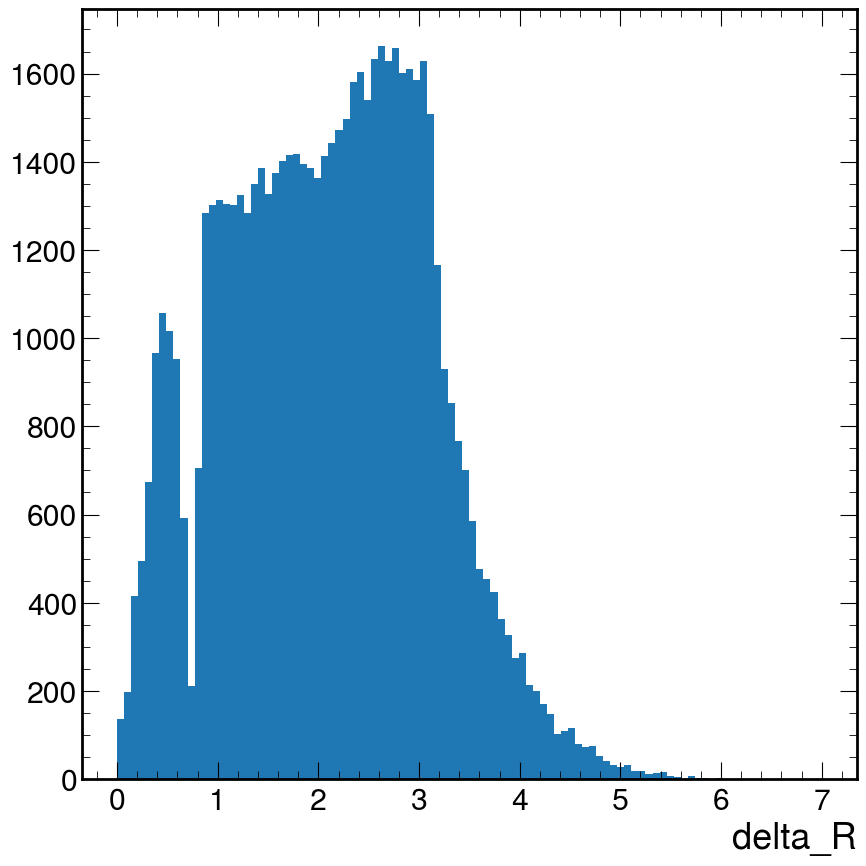

In [205]:
plt.hist(ak.flatten(dr_filled2), range = (0,7), bins = 100)
plt.xlabel('delta_R')

Text(1, 0, 'delta_R')

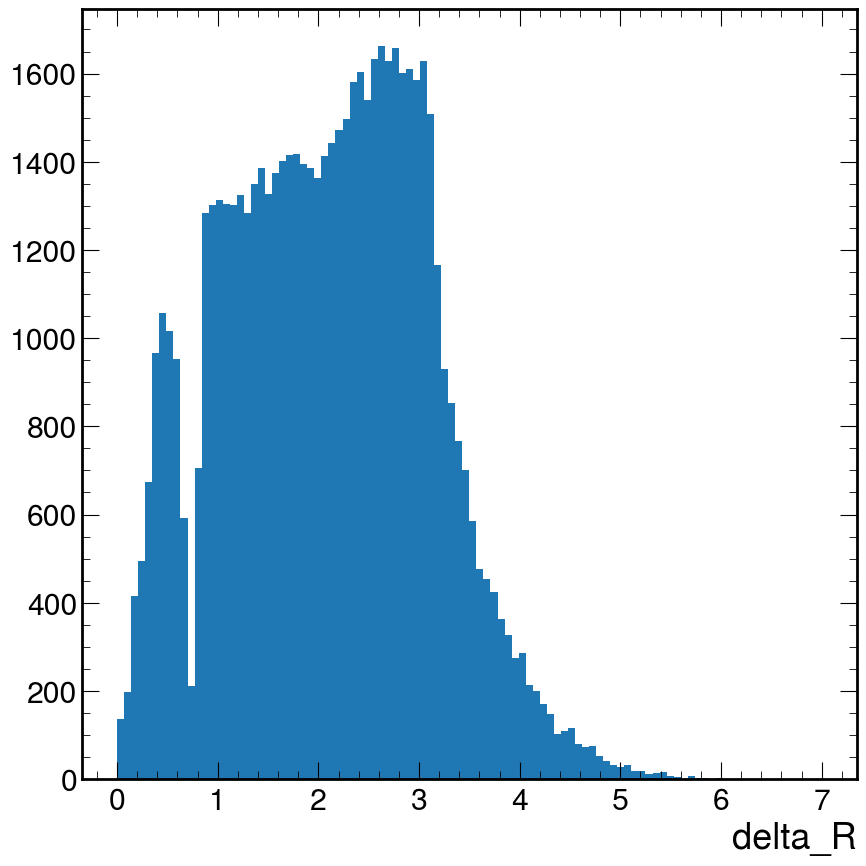

In [206]:
plt.hist(ak.flatten(dr_filled2), range = (0,7), bins = 100)
plt.xlabel('delta_R')

In [147]:
ak.num(filtered_fatjets)

<Array [2, 2, 1, 2, 2, 1, ... 2, 2, 2, 3, 3, 5] type='88095 * int64'>

In [148]:


keep3 = ak.num(filtered_fatjets) > 1
events_filtered = events_2J[keep3]
keep3

<Array [True, True, False, ... True, True] type='88095 * bool'>

(array([6.870e+02, 6.910e+02, 7.000e+02, 6.500e+02, 4.260e+02, 2.390e+02,
        5.500e+01, 3.450e+02, 4.060e+02, 4.180e+02, 4.550e+02, 5.720e+02,
        5.760e+02, 5.430e+02, 5.790e+02, 5.680e+02, 5.970e+02, 6.220e+02,
        6.400e+02, 7.520e+02, 7.390e+02, 7.570e+02, 7.900e+02, 8.800e+02,
        8.910e+02, 9.710e+02, 8.970e+02, 9.240e+02, 1.043e+03, 1.080e+03,
        1.158e+03, 1.235e+03, 1.299e+03, 1.445e+03, 1.449e+03, 1.627e+03,
        1.738e+03, 1.660e+03, 1.885e+03, 1.984e+03, 1.896e+03, 1.933e+03,
        2.161e+03, 2.061e+03, 2.165e+03, 2.032e+03, 2.050e+03, 1.973e+03,
        2.045e+03, 1.668e+03, 1.352e+03, 1.200e+03, 1.015e+03, 9.920e+02,
        8.470e+02, 7.390e+02, 6.570e+02, 5.410e+02, 5.670e+02, 4.950e+02,
        4.630e+02, 4.450e+02, 3.810e+02, 3.540e+02, 2.820e+02, 3.340e+02,
        2.770e+02, 2.590e+02, 1.960e+02, 1.760e+02, 1.410e+02, 1.070e+02,
        1.290e+02, 1.210e+02, 9.800e+01, 1.150e+02, 5.500e+01, 6.700e+01,
        5.800e+01, 6.100e+01, 3.600e+0

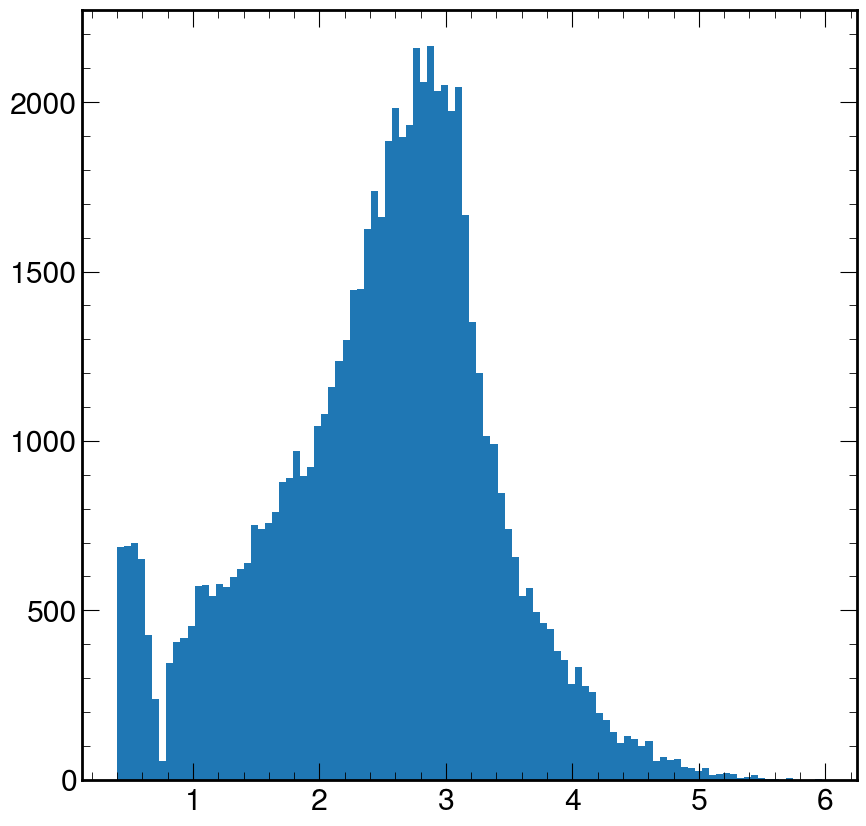

In [149]:
plt.hist(ak.flatten(filtered_fatjets[keep3][:,0].delta_r(matched_mu[keep3])), bins = 100)


(array([6.9474e+04, 1.2608e+04, 3.6160e+03, 1.8460e+03, 4.1500e+02,
        9.0000e+01, 3.1000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([-1. , -0.1,  0.8,  1.7,  2.6,  3.5,  4.4,  5.3,  6.2,  7.1,  8. ]),
 <BarContainer object of 10 artists>)

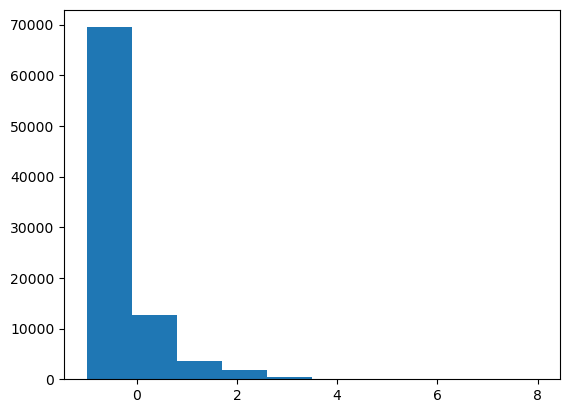

In [59]:
plt.hist(events_2J.FatJet[:,0].muonIdx3SJ)

In [22]:
events_muon = events_2J[events_2J.FatJet[:, 0].muonIdx3SJ > -1]

(array([1.2608e+04, 3.6160e+03, 1.8460e+03, 4.1500e+02, 0.0000e+00,
        9.0000e+01, 3.1000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

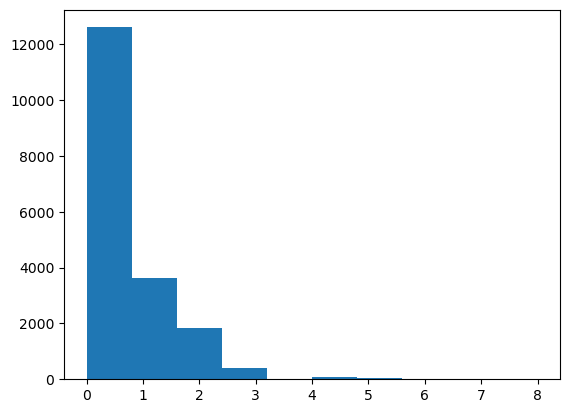

In [58]:
plt.hist(events_muon.FatJet[:,0].muonIdx3SJ)

(array([7.140e+02, 3.160e+02, 2.150e+02, 1.600e+02, 1.230e+02, 8.400e+01,
        7.900e+01, 5.100e+01, 5.700e+01, 4.200e+01, 2.400e+01, 1.600e+01,
        5.500e+01, 1.340e+02, 1.000e+02, 1.260e+02, 9.500e+01, 9.600e+01,
        1.100e+02, 1.100e+02, 1.020e+02, 1.010e+02, 9.300e+01, 9.600e+01,
        1.070e+02, 1.200e+02, 1.220e+02, 1.240e+02, 1.120e+02, 1.080e+02,
        1.010e+02, 1.240e+02, 1.230e+02, 1.450e+02, 1.250e+02, 1.570e+02,
        1.670e+02, 1.970e+02, 2.170e+02, 2.730e+02, 2.910e+02, 3.690e+02,
        4.180e+02, 5.050e+02, 6.200e+02, 7.500e+02, 9.070e+02, 1.099e+03,
        1.293e+03, 1.159e+03, 7.980e+02, 6.690e+02, 5.450e+02, 4.930e+02,
        4.480e+02, 3.520e+02, 3.200e+02, 2.650e+02, 2.610e+02, 2.060e+02,
        2.060e+02, 1.890e+02, 1.360e+02, 1.180e+02, 1.050e+02, 9.400e+01,
        8.700e+01, 7.900e+01, 5.800e+01, 4.700e+01, 5.400e+01, 4.000e+01,
        3.700e+01, 3.900e+01, 2.000e+01, 2.200e+01, 2.100e+01, 1.900e+01,
        1.500e+01, 1.400e+01, 8.000e+0

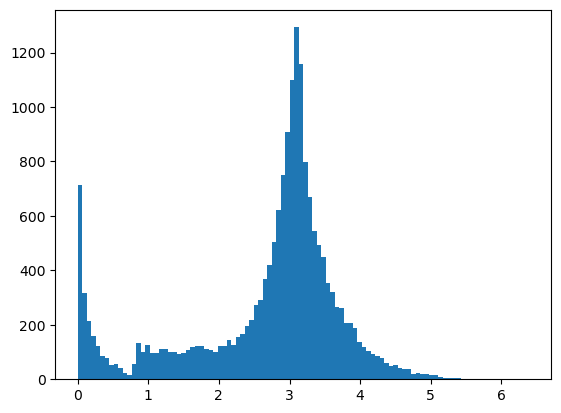

In [55]:
plt.hist(events_muon.Muon[:,0].delta_r(events_muon.FatJet[:,1]), bins = 100)

In [51]:
i = 3424
events_muon.Muon[i, 0].delta_r(events_muon.FatJet[i,0])

4.687643903658689

(array([ 3521.,  9225., 13480., 16019., 16895., 13997.,  4371.,  1174.,
          364.,    53.]),
 array([3.96728516e-03, 5.57847261e-01, 1.11172724e+00, 1.66560721e+00,
        2.21948719e+00, 2.77336717e+00, 3.32724714e+00, 3.88112712e+00,
        4.43500710e+00, 4.98888683e+00, 5.54276705e+00]),
 <BarContainer object of 10 artists>)

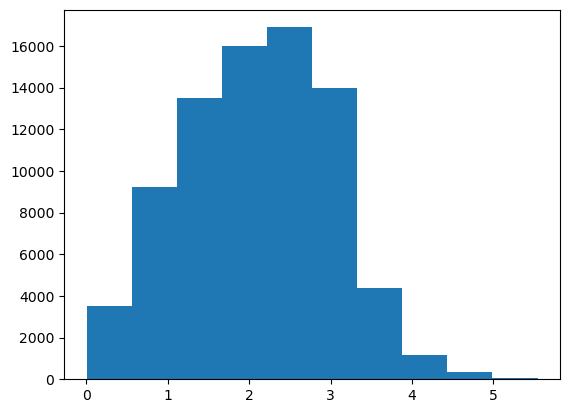

In [38]:
plt.hist(ak.flatten(events_muon.Muon[events_muon.FatJet[:, 0].muonIdx3SJ].delta_r(events_muon.FatJet[:,0])))

(array([ 3521.,  9225., 13480., 16019., 16895., 13997.,  4371.,  1174.,
          364.,    53.]),
 array([3.96728516e-03, 5.57847261e-01, 1.11172724e+00, 1.66560721e+00,
        2.21948719e+00, 2.77336717e+00, 3.32724714e+00, 3.88112712e+00,
        4.43500710e+00, 4.98888683e+00, 5.54276705e+00]),
 <BarContainer object of 10 artists>)

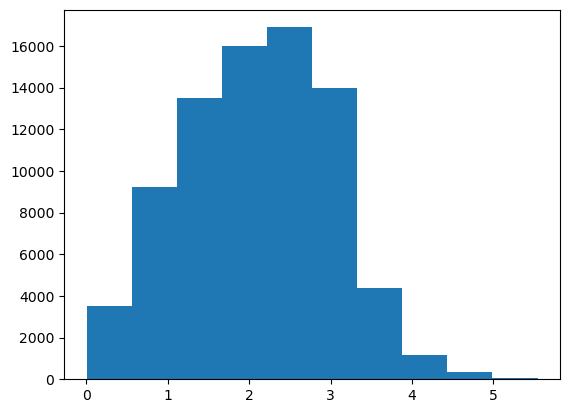

In [24]:
plt.hist(ak.flatten(events_muon.FatJet[:,0].delta_r(events_muon.Muon[events_muon.FatJet[:, 0].muonIdx3SJ])))

In [134]:


events = events[(events.FatJet.mass[:,0] > 20) & (events.FatJet.matched_gen.mass[:,0] < 20) ]

In [93]:
events_wmuon = events[ak.num(events.Muon)==2]

In [130]:
events_wmuon.FatJet[:,0].mass.to_numpy()

masked_array(data=[ 38.03125 ,  43.09375 ,  32.21875 ,  68.9375  ,
                    34.34375 ,  37.96875 ,  31.8125  ,  39.03125 ,
                   249.125   ,  45.0625  ,  36.625   ,  36.34375 ,
                    30.578125,  34.625   ,  42.0625  ,  31.78125 ,
                    39.375   ,  35.25    ,  32.5     ,  34.      ,
                    30.6875  ,  41.5625  ,  30.015625,  46.5     ,
                    34.5     ,  48.6875  ,  37.375   ,  32.75    ,
                    32.71875 ,  36.75    ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [131]:
events_wmuon.FatJet[:,0].matched_gen.mass.to_numpy()

masked_array(data=[18.84375  , 18.75     , 19.53125  , 19.796875 ,
                   19.765625 , 14.96875  , 19.546875 , 18.890625 ,
                    5.9609375, 17.953125 ,  1.9707031, 19.234375 ,
                   15.7890625, 18.78125  , 12.7578125, 18.0625   ,
                   19.953125 , 18.078125 , 18.84375  , 18.734375 ,
                   19.28125  , 19.671875 , 16.59375  , 14.0546875,
                   13.65625  , 13.296875 , 15.84375  , 18.375    ,
                   16.8125   , 17.21875  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [96]:
events_wmuon.FatJet[:,0].jetId.to_numpy()

masked_array(data=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
                   6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [113]:
events_wmuon.Jet[:,0].puIdDisc.to_numpy()

masked_array(data=[0.9975586 , 0.99853516, 0.9682617 , 0.9614258 ,
                   0.9970703 , 0.99853516, 0.99609375, 0.99853516,
                   0.98828125, 0.9941406 , 0.9873047 , 0.9980469 ,
                   0.9980469 , 0.99365234, 0.8676758 , 0.9970703 ,
                   0.9711914 , 0.9980469 , 0.9814453 , 0.9536133 ,
                   0.99853516, 0.99365234, 0.99609375, 0.9980469 ,
                   0.9916992 , 0.9970703 , 0.8466797 , 0.99853516,
                   0.9277344 , 0.99853516],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Text(0, 0.5, 'counts')

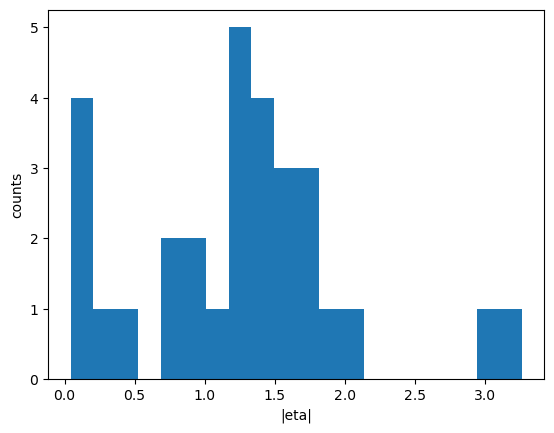

In [140]:
import matplotlib.pyplot as plt
plt.hist(np.abs(events_wmuon.Jet[:,0].eta), bins = 20, )
plt.xlabel('|eta|')
plt.ylabel('counts')

In [98]:
events_wmuon.Jet[:,0].puId.to_numpy()

masked_array(data=[7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                   7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [99]:
import pandas as pd

# Assuming you already have these arrays
fatjet_mass = events_wmuon.FatJet[:, 0].mass.to_numpy()
matched_gen_mass = events_wmuon.FatJet[:, 0].matched_gen.mass.to_numpy()
jet_id = events_wmuon.FatJet[:, 0].jetId.to_numpy()
pu_id_disc = events_wmuon.Jet[:, 0].puIdDisc.to_numpy()
pu_id = events_wmuon.Jet[:, 0].puId.to_numpy()
jet_eta = events_wmuon.Jet[:, 0].eta.to_numpy()
eta = events_wmuon.FatJet[:, 0].eta.to_numpy()
event_number = events_wmuon.event.to_numpy()
lumi = events_wmuon.luminosityBlock.to_numpy()
n_muon = ak.num(events_wmuon.Muon, axis = 1)
# Create DataFrame
df = pd.DataFrame({
    'Reco_mass': fatjet_mass,
    'Gen_mass': matched_gen_mass,
    'event': event_number,
    'lumi' : lumi,
    'JetID': jet_id,
    'PUIdDisc': pu_id_disc,
    'PUId(AK4)': pu_id,
    'Ak4jet_eta': jet_eta,
    'Ak8jet_eta': eta,
    'number of muon': n_muon
    
})

# Show table
df

,Reco_mass,Gen_mass,event,lumi,JetID,PUIdDisc,PUId(AK4),Ak4jet_eta,Ak8jet_eta,number of muon
0,38.031250,18.843750,717358,98,6,0.997559,7,-1.687744,-1.687744,2
1,43.093750,18.750000,1282740,175,6,0.998535,7,-1.235596,-1.234375,2
2,32.218750,19.531250,1283127,175,6,0.968262,3,1.815430,1.810791,2
3,68.937500,19.796875,2296221,313,6,0.961426,3,-1.373291,-1.373779,2
4,34.343750,19.765625,4428909,602,6,0.997070,7,-1.604736,-1.609375,2
5,37.968750,14.968750,4438114,604,6,0.998535,7,0.192657,0.192505,2
6,31.812500,19.546875,4498563,612,6,0.996094,7,-0.986816,-0.986694,2
7,39.031250,18.890625,1378635,188,6,0.998535,7,1.188232,1.191895,2
8,249.125000,5.960938,21328088,2899,6,0.988281,7,0.043114,-1.426514,2
9,45.062500,17.953125,1820635,248,6,0.994141,7,-1.261719,-1.267822,2


In [56]:
e = 306
m = 20

In [57]:
e = 300.66
np.sqrt(e**2 - m**2)

299.994059274513

In [31]:
events_wmuon.FatJet[:,0].eta

<Array [-1.69, -1.23, 1.81, ... 1.46, -1.55] type='30 * ?float32[parameters={"__...'>

In [32]:
events_wmuon.event.to_list()

[717358,
 1282740,
 1283127,
 2296221,
 4428909,
 4438114,
 4498563,
 1378635,
 21328088,
 1820635,
 22040535,
 24867615,
 451389,
 1796466,
 21346876,
 24177236,
 483724,
 2507450,
 15103254,
 16012389,
 16050964,
 17352429,
 25059281,
 26219328,
 26735722,
 26738961,
 5932159,
 15747746,
 15790518,
 19618899]

In [40]:
events_wmuon.luminosityBlock.to_list()

[98,
 175,
 175,
 313,
 602,
 604,
 612,
 188,
 2899,
 248,
 2996,
 3380,
 62,
 245,
 2902,
 3286,
 66,
 341,
 2053,
 2177,
 2182,
 2359,
 3406,
 3564,
 3634,
 3634,
 807,
 2141,
 2147,
 2667]

In [14]:
events.FatJet[:,0].mass

<Array [41.6, 38, 43.1, ... 39.4, 205, 31.2] type='113 * ?float32[parameters={"_...'>

In [18]:
events.run

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='113 * ?uint32[parameters={...'>

In [16]:
events.event

<Array [715154, 717358, ... 12013440, 12015346] type='113 * ?uint64[parameters={...'>

In [17]:
events.luminosityBlock

<Array [98, 98, 175, 175, ... 1633, 1633, 1633] type='113 * ?uint32[parameters={...'>

In [15]:
events.FatJet[:,0].matched_gen.mass

<Array [15.7, 18.8, 18.8, ... 19.2, 17.9, 18.8] type='113 * ?float32[parameters=...'>

In [11]:
events.FatJet[:,0].subJetIdx1

<Array [0, 0, 0, 0, 2, 0, ... 0, 0, 0, -1, 0] type='239 * ?int32[parameters={"__...'>

(array([115.,  51.,  31.,  17.,   8.,   4.,   5.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.00069053, 0.00499708, 0.00930362, 0.01361016, 0.0179167 ,
        0.02222325, 0.02652979, 0.03083633, 0.03514287, 0.03944941,
        0.04375596, 0.0480625 , 0.05236904, 0.05667558, 0.06098212,
        0.06528866, 0.06959521, 0.07390175, 0.07820829, 0.08251484,
        0.08682138, 0.09112792, 0.09543446, 0.

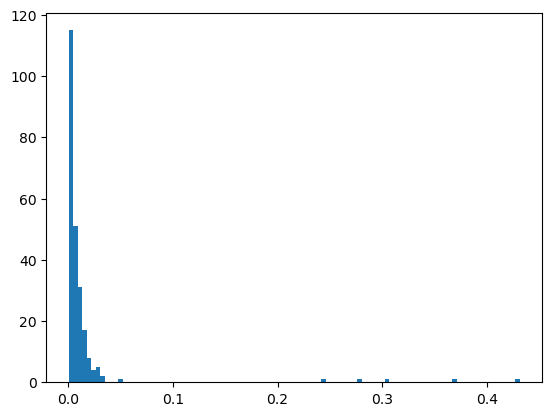

In [261]:
plt.hist(events.FatJet[:,0].delta_r(events.FatJet[:,0].matched_gen), bins = 100)

In [250]:
from python.smp_utils import find_closest_dr

In [251]:
subjet1 = events.SubJet[events.FatJet[:,0].subJetIdx1]
subjet1.eta

<Array [[-1.01, -1.04, ... -0.938, -0.945]] type='88371 * var * float32[paramete...'>

In [252]:
closest_jet, dr = find_closest_dr(subjet1, events.Jet)

In [253]:
closest_jet.eta

<Array [-0.935, 0.454, ... -0.891, -1.08] type='88371 * ?float32[parameters={"__...'>

In [254]:
subjet1.eta

<Array [[-1.01, -1.04, ... -0.938, -0.945]] type='88371 * var * float32[paramete...'>

(array([3.3670e+03, 8.8630e+03, 1.2030e+04, 1.2810e+04, 1.2194e+04,
        1.0789e+04, 8.8320e+03, 6.8840e+03, 4.6040e+03, 3.1010e+03,
        1.9480e+03, 1.1910e+03, 7.9100e+02, 4.2300e+02, 2.6700e+02,
        1.4200e+02, 7.4000e+01, 3.7000e+01, 1.8000e+01, 6.0000e+00]),
 array([0.        , 0.15000001, 0.30000001, 0.44999999, 0.60000002,
        0.75      , 0.89999998, 1.04999995, 1.20000005, 1.35000002,
        1.5       , 1.64999998, 1.79999995, 1.95000005, 2.0999999 ,
        2.25      , 2.4000001 , 2.54999995, 2.70000005, 2.8499999 ,
        3.        ]),
 <BarContainer object of 20 artists>)

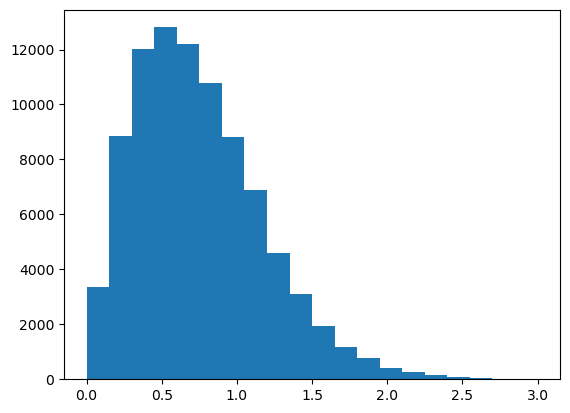

In [256]:
plt.hist(dr, bins = 20, range = (0,3))


## Look at jets when d

Text(0.5, 0, 'puIdDisc')

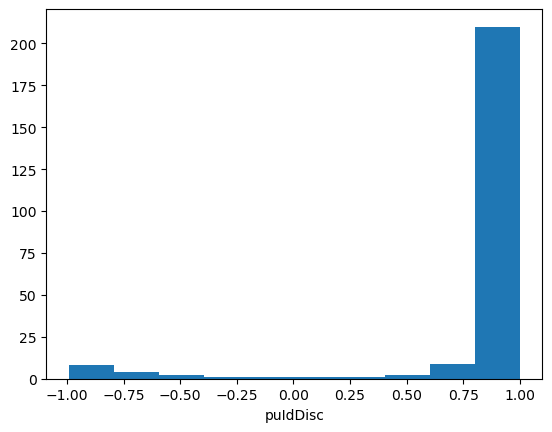

In [230]:
plt.hist(closest_jet.puIdDisc)
plt.xlabel("puIdDisc")

In [ ]:
plt.hist(.mass)

(array([90., 42., 41., 36., 15.,  6.,  6.,  0.,  2.,  1.]),
 array([ 0.11151123,  8.73785973, 17.36420822, 25.99055862, 34.61690521,
        43.24325562, 51.86960602, 60.49595261, 69.12229919, 77.7486496 ,
        86.375     ]),
 <BarContainer object of 10 artists>)

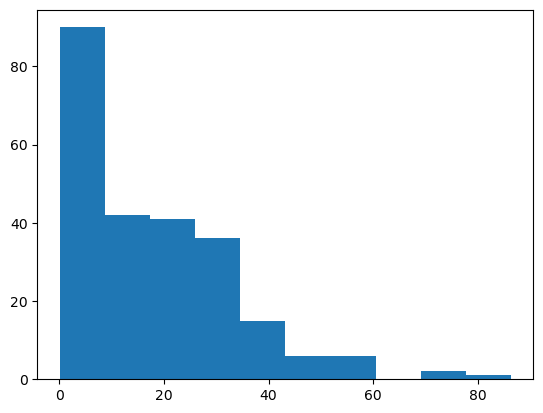

In [231]:
plt.hist(closest_jet.mass)

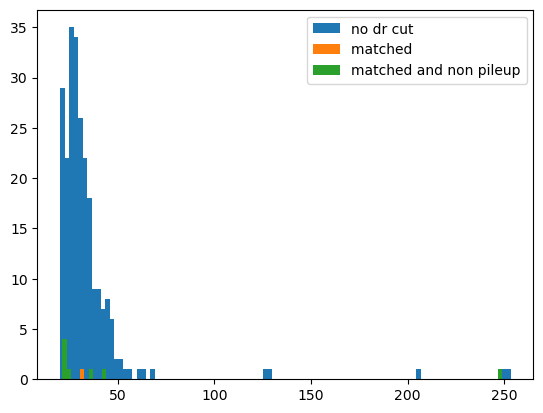

In [246]:
plt.hist(events.FatJet[:,0].mass, bins = 100, label = "no dr cut")
plt.hist(events[(dr < 0.1)  ].FatJet[:,0].mass, bins = 100, label = "matched ")
plt.hist(events[(dr < 0.1) & (closest_jet.puId > 0  ) ].FatJet[:,0].mass, bins = 100, label = "matched and non pileup")

plt.legend()

(array([ 2.,  9., 14., 23., 27., 18., 19., 17., 18., 10.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

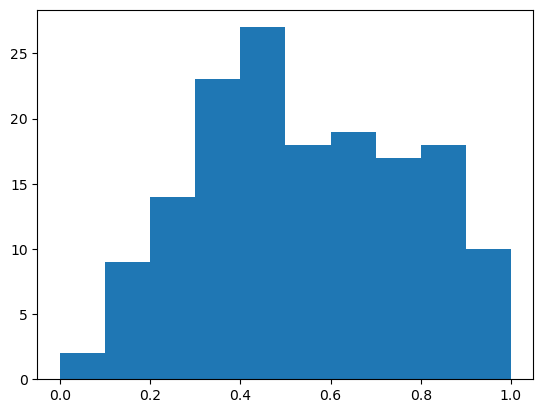

In [244]:
sel = closest_jet.puId > 0
plt.hist(np.abs(events[sel].FatJet[:,0].mass - events[sel].FatJet[:,0].matched_gen.mass )/events[sel].FatJet[:,0].matched_gen.mass, range  = (0,1))

(array([0., 0., 0., 0., 0., 0., 0., 1., 2., 1.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

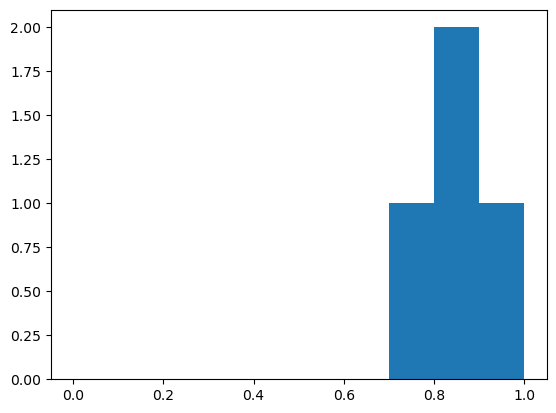

In [245]:
sel = closest_jet.puId == 0
plt.hist(np.abs(events[sel].FatJet[:,0].mass - events[sel].FatJet[:,0].matched_gen.mass )/events[sel].FatJet[:,0].matched_gen.mass, range  = (0,1))

In [ ]:
plt.hist(events.FatJet[:,0].mass, bins = 100, label = "no dr cut")
plt.hist(events[(dr < 0.4) & * ].FatJet[:,0].mass, bins = 100, label = "matched")

plt.legend()

Text(0.5, 0, 'puIdDisc')

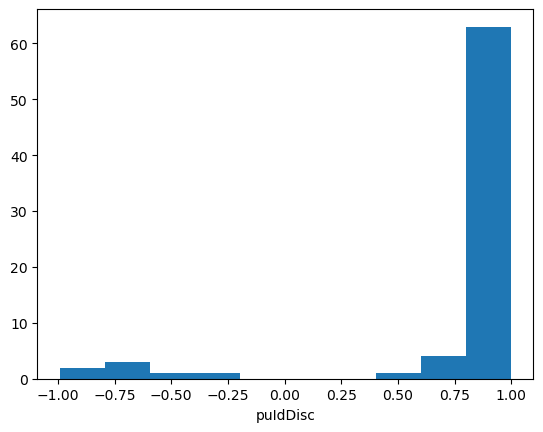

In [229]:
plt.hist(closest_jet[dr < 0.4].puIdDisc)
plt.xlabel("puIdDisc")

Text(0.5, 0, 'puId')

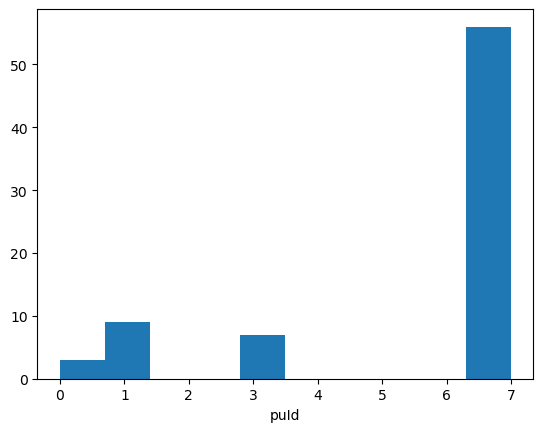

In [225]:
plt.hist(closest_jet[dr < 0.4].puId)
plt.xlabel("puId")

Text(0.5, 0, 'neHEF')

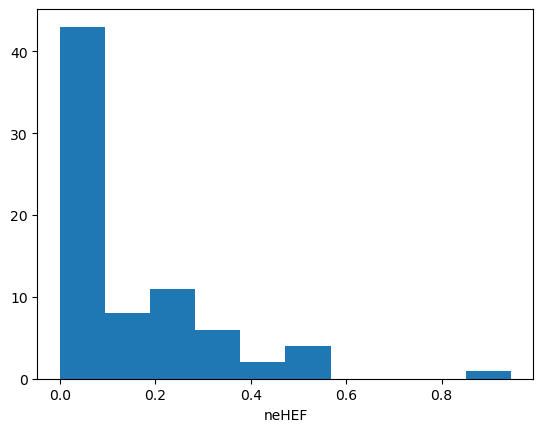

In [226]:
plt.hist(closest_jet[dr < 0.4].neHEF)
plt.xlabel("neHEF")

Text(0.5, 0, 'neHEF')

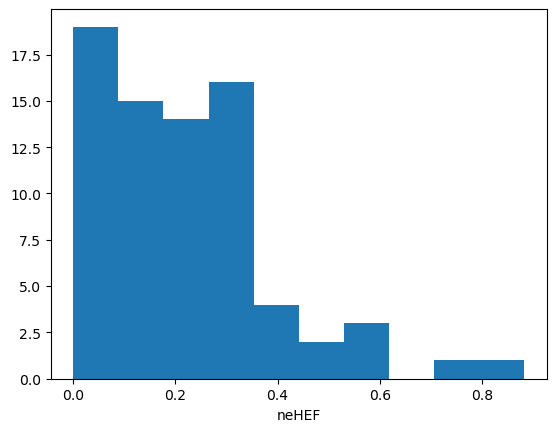

In [227]:
plt.hist(closest_jet[dr < 0.4].neEmEF)
plt.xlabel("neHEF")

In [ ]:
def find_closest_dr( a, coll , verbose = False):
    '''
    Find the objects within coll that are closest to a. 
    Return it and the delta R between it and a.
    '''
    combs = ak.cartesian( (a, coll), axis=1 )
    dr = combs['0'].delta_r(combs['1'])
    dr_min = ak.singletons( ak.argmin( dr, axis=1 ) )
    sel = combs[dr_min]['1']
    return ak.firsts(sel),ak.firsts(dr[dr_min])

In [182]:
subjet1.phi

<Array [[2.91, 2.94, 0.245, ... -0.15, -0.181]] type='239 * option[var * float32...'>

In [185]:
events.Jet.phi

<Array [[2.92, 0.389, -2.35, ... 0.668, -2.25]] type='239 * option[var * float32...'>

In [175]:
events.FatJet[:,0].subJetIdx2

<Array [1, 1, 1, 1, 3, -1, ... 1, 1, 1, -1, 1] type='239 * ?int32[parameters={"_...'>

In [ ]:
events.FatJet[:,0].

(array([ 15.,  28., 118.,  70.,   0.,   3.,   2.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

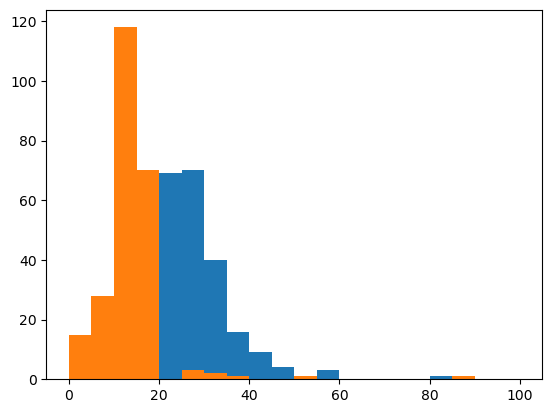

In [134]:
import matplotlib.pyplot as plt
plt.hist(events.Jet[:,0].mass, range = (0, 100), alpha = 1, bins = 20)
plt.hist(events.Jet[:,0].matched_gen.mass, range = (0, 100), alpha = 1, bins = 20)

(array([  3.,   5.,  38., 193.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

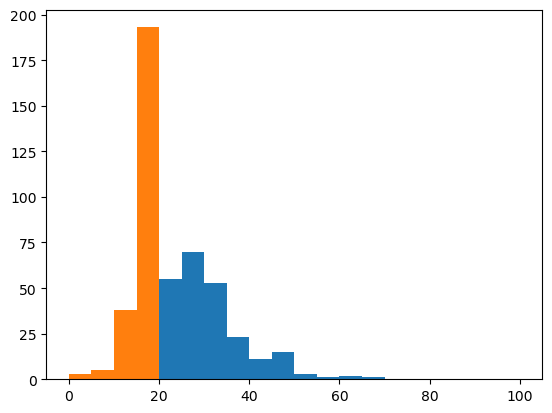

In [136]:
import matplotlib.pyplot as plt
plt.hist(events.FatJet[:,0].mass, range = (0, 100), alpha = 1, bins = 20)
plt.hist(events.FatJet[:,0].matched_gen.mass, range = (0, 100), alpha = 1, bins = 20)

In [155]:

i = 13
eta = events.FatJet[i:i+1,0].eta
phi = events.FatJet[i:i+1,0].phi
pt = events.FatJet[i:i+1,0].pt
m = events.FatJet[i:i+1,0].mass
p = events.FatJet[i:i+1,0].p
e = events.FatJet[i:i+1,0].E

print(eta, phi, pt, p,e, m)

eta = events.FatJet[i:i+1,0].matched_gen.eta
phi = events.FatJet[i:i+1,0].matched_gen.phi
pt = events.FatJet[i:i+1,0].matched_gen.pt
m = events.FatJet[i:i+1,0].matched_gen.mass
p = events.FatJet[i:i+1,0].matched_gen.p
e = events.FatJet[i:i+1,0].matched_gen.E

print(eta, phi, pt,p, e, m)

[-1.53] [1.39] [760] [1.83e+03] [1.83e+03] [22.8]
[-1.53] [1.39] [673] [1.62e+03] [1.62e+03] [0.357]


[-1.76] [-1.08] [353] [1.05e+03] [1.05e+03] [31]
[-1.74] [-1.09] [347] [1.02e+03] [1.02e+03] [16.9]


(array([15., 34., 74., 69., 36.,  8.,  3.,  0.,  0.,  2.]),
 array([ 3.,  9., 15., 21., 27., 33., 39., 45., 51., 57., 63.]),
 <BarContainer object of 10 artists>)

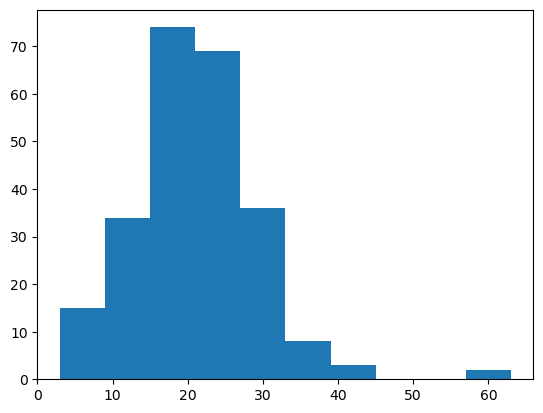

In [103]:
plt.hist(events.FatJet[:,0].nConstituents)

(array([  4.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0., 223.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

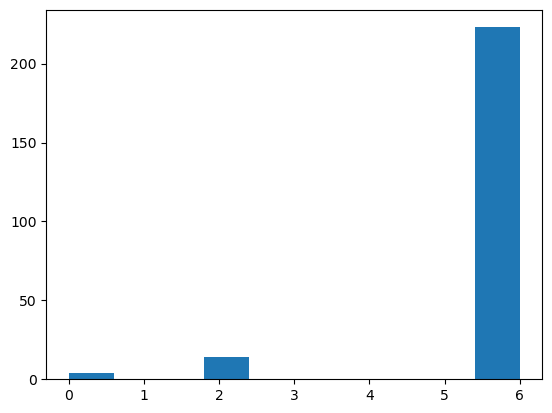

In [105]:
plt.hist(events.FatJet[:,0].jetId)

In [116]:
events.FatJet.systematics

<Array [] type='0 * option[var * {}]'>

(array([210.,  22.,   2.,   2.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([-3.05175781e-05,  3.86559749e+00,  7.73122549e+00,  1.15968533e+01,
         1.54624815e+01,  1.93281097e+01,  2.31937370e+01,  2.70593662e+01,
         3.09249935e+01,  3.47906227e+01,  3.86562500e+01]),
 <BarContainer object of 10 artists>)

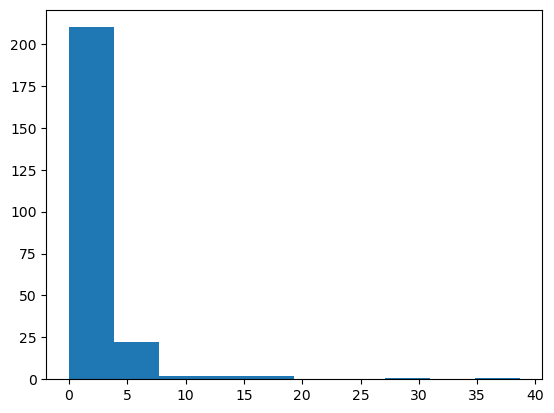

(array([233.,   4.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.]),
 array([ -1.        ,  24.14999962,  49.29999924,  74.44999695,
         99.59999847, 124.75      , 149.8999939 , 175.05000305,
        200.19999695, 225.3500061 , 250.5       ]),
 <BarContainer object of 10 artists>)

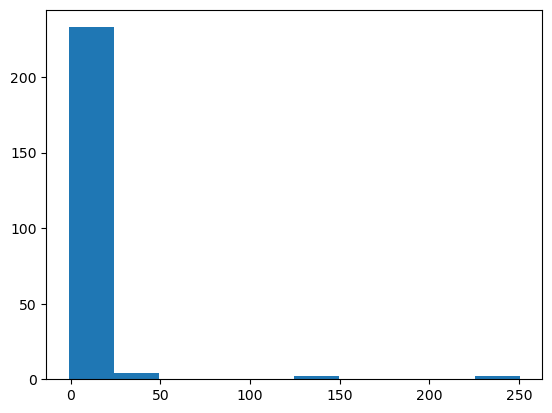

In [115]:
plt.hist(events.FatJet[:,0].msoftdrop)

In [68]:
import uproot
file = uproot.open(file_path)
events = file['Events']

In [74]:
events['FatJet_nConstituents'].array()

<Array [[26, 25], [30, ... 30, 36, 58, 39, 41]] type='88374 * var * uint8'>

In [27]:
mask = np.array(masks['2017'](events.run, events.luminosityBlock))

In [30]:
events.run

<Array [305064, 305064, ... 306459, 306459] type='2041396 * uint32[parameters={"...'>

In [29]:
events.luminosityBlock

<Array [1145, 1145, 1145, ... 764, 764, 764] type='2041396 * uint32[parameters={...'>

In [31]:
events[mask]

<NanoEventsArray [<event 305064:1145:1579364524>, ... ] type='1942640 * event'>

In [34]:
print("Len of all events", len(events))
print("len of masked events", len(events[mask]))

Len of all events 2041396
len of masked events 1942640


In [15]:
sel = (ak.sum(events.GenJetAK8.pt > 200, axis  = 1) > 0 ) 



In [16]:
filtered_events = events[ sel ] [5:10]

fe = filtered_events

In [17]:
print(events[:10].LHEWeight.originalXWGTUP)

[0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]


In [19]:
26202328*0.143

3746932.9039999996

In [ ]:
print(events[:10].LHEWeight.originalXWGTUP)

In [52]:
print("Fatjet pt", fe.FatJet.pt.to_list())
print("Electron pt", fe.Electron.pt.to_list())
print("Muon pt", fe.Muon.pt.to_list())

Fatjet pt [[358.25], [305.75, 179.75], [265.75, 189.25], [218.375, 205.0], [234.0]]
Electron pt [[109.0477294921875, 17.337961196899414], [45.84010696411133], [], [], []]
Muon pt [[], [3721.96240234375, 33.4672966003418, 22.563199996948242], [], [31.33032989501953], [34.57164764404297]]


In [69]:
comb = ak.cartesian((fe.FatJet, fe.Electron))
print(comb['0'].pt)
print("D phi", comb['0'].delta_phi(comb['1']))
delta_phi = comb['0'].delta_phi(comb['1'])
sel = delta_phi > 0
print(ak.where(ak.num(delta_phi, axis = 1) == 0 , ak.full_like(fe.FatJet.pt, 500 ), delta_phi ))
print(sel > 0)
print('after correction', ak.where(ak.num(sel, axis = 1) == 0 , ak.full_like(fe.FatJet.pt, True , dtype=bool), sel ))

[[358, 358], [306, 180], [], [], []]
D phi [[-2.74, 2.4], [-2.73, 0.587], [], [], []]
[[-2.74, 2.4], [-2.73, 0.587], [500, 500], [500, 500], [500]]
[[False, True], [False, True], [], [], []]
after correction [[False, True], [False, True], [True, True], [True, True], [True]]


In [81]:
leading_lepton = ak.firsts(fe.Electron)
delta_phi_mask = fe.FatJet.delta_phi(leading_lepton) >0
print(delta_phi_mask)

delta_phi_mask = ak.where(ak.is_none(delta_phi_mask), ak.full_like(fe.FatJet.pt, True, dtype=bool), delta_phi_mask)
print(delta_phi_mask)


[[False], [False, True], None, None, None]
[[False], [False, True], [True, True], [True, True], [True]]


<Array [[False], [False, ... None, None, None] type='5 * option[var * bool]'>

In [57]:
from coffea.lookup_tools import extractor

In [63]:
import os
ext = extractor()
AK_str = "AK8PFPuppi"
tag = "Summer19UL17_RunF_V6_DATA"
print("In the DATA section")
print("File "+'correctionFiles/JEC/{0}/{0}_L1FastJet_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)+" exists: ", os.path.exists('correctionFiles/JEC/{0}/{0}_L1FastJet_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)))
print("File "+'correctionFiles/JEC/{0}/{0}_L2Relative_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)+" exists: ", os.path.exists('correctionFiles/JEC/{0}/{0}_L2Relative_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)))
print("File "+'correctionFiles/JEC/{0}/{0}_L3Absolute_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)+" exists: ", os.path.exists('correctionFiles/JEC/{0}/{0}_L3Absolute_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)))
print("File "+'correctionFiles/JEC/{0}/{0}_L2L3Residual_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)+" exists: ", os.path.exists('correctionFiles/JEC/{0}/{0}_L2L3Residual_{1}.jec.txt'.format("Summer19UL17_RunF_V6_DATA", AK_str)))

ext.add_weight_sets([
'* * '+'correctionFiles/JEC/{0}/{0}_L1FastJet_{1}.jec.txt'.format(tag, AK_str),
'* * '+'correctionFiles/JEC/{0}/{0}_L2Relative_{1}.jec.txt'.format(tag, AK_str),
'* * '+'correctionFiles/JEC/{0}/{0}_L3Absolute_{1}.jec.txt'.format(tag, AK_str),
'* * '+'correctionFiles/JEC/{0}/{0}_L2L3Residual_{1}.jec.txt'.format(tag, AK_str),
])

print("Added JEC weight sets")

In the DATA section
File correctionFiles/JEC/Summer19UL17_RunF_V6_DATA/Summer19UL17_RunF_V6_DATA_L1FastJet_AK8PFPuppi.jec.txt exists:  True
File correctionFiles/JEC/Summer19UL17_RunF_V6_DATA/Summer19UL17_RunF_V6_DATA_L2Relative_AK8PFPuppi.jec.txt exists:  True
File correctionFiles/JEC/Summer19UL17_RunF_V6_DATA/Summer19UL17_RunF_V6_DATA_L3Absolute_AK8PFPuppi.jec.txt exists:  True
File correctionFiles/JEC/Summer19UL17_RunF_V6_DATA/Summer19UL17_RunF_V6_DATA_L2L3Residual_AK8PFPuppi.jec.txt exists:  True


FileNotFoundError: [Errno 2] No such file or directory: 'correctionFiles/JEC/Summer19UL17_RunF_V6_DATA/Summer19UL17_RunF_V6_DATA_L1FastJetg_AK8PFPuppi.jec.txt'

In [61]:
ext